# Part 1

## Question 1

In [1]:
import math

#Total number of entities= 8
#Total number of defaulters= 0: 4
##Total number of defaulters= 1: 4
Entropy= -((4/8)*math.log2(4/8))-((4/8)*math.log2(4/8))
print(Entropy)

1.0


In [2]:
#FOR HAS JOB:
# P(Has Job= 0) = 3/8
#For P(has Job=0)= 0:
 #P(Defaulter_Has Job= 0)=1/3
 #P(Defaulter_Has Job= 1)=2/3
 #CONDITIONAL_ENTROPY= (3/8)*(-(1/3)*math.log2(1/3)-(2/3)*math.log2(2/3))

# P(Has Job=1) = 5/8
#For P(has Job=1)= 1:
 #P(Defaulter_Has Job= 0)=3/5
 #P(Defaulter_Has Job= 1)=2/5
 #CONDITIONAL_ENTROPY= (5/8)*(-(3/5)*math.log2(3/5)-(2/5)*math.log2(2/5))


Conditional_Entropy_Has_Job= (3/8)*(-(1/3)*math.log2(1/3)-(2/3)*math.log2(2/3))+ (5/8)*(-(3/5)*math.log2(3/5)-(2/5)*math.log2(2/5))
print("Conditional_Entropy_Has_Job= ",Conditional_Entropy_Has_Job)
Has_Job_IG = Entropy-Conditional_Entropy_Has_Job
print("Has_Job_IG =",Has_Job_IG)

Conditional_Entropy_Has_Job=  0.9512050593046015
Has_Job_IG = 0.04879494069539847


In [3]:
#FOR Has Family:
# P(Has Family= 0) = 4/8
#For P(has fa,ily=0)= 0:
 #P(Defaulter_Has family= 0)=3/4
 #P(Defaulter_Has family= 1)=1/4
 #CONDITIONAL_ENTROPY= (4/8)*(-(3/4)*math.log2(3/4)-(1/4)*math.log2(1/4))

# P(Has family=1) = 4/8
#For P(has family=1)= 1:
 #P(Defaulter_Has family= 0)=3/4
 #P(Defaulter_Has family= 1)=1/4
 #CONDITIONAL_ENTROPY= (4/8)*(-(1/4)*math.log2(1/4)-(3/4)*math.log2(3/4))


Conditional_Entropy_Has_Family= (4/8)*(-(3/4)*math.log2(3/4)-(1/4)*math.log2(1/4))+ (4/8)*(-(1/4)*math.log2(1/4)-(3/4)*math.log2(3/4))
print("Conditional_Entropy_Has_Family= ",Conditional_Entropy_Has_Family)
Has_Family_IG = Entropy-Conditional_Entropy_Has_Family
print("Has_Family_IG =",Has_Family_IG)

Conditional_Entropy_Has_Family=  0.8112781244591328
Has_Family_IG = 0.18872187554086717


In [4]:
#FOR 30years:
# P(30years= 0) = 2/8
#For P(30years=0)= 0:
 #P(Defaulter_30years= 0)=1/2
 #P(Defaulter_30years= 1)=1/2
 #CONDITIONAL_ENTROPY= (2/8)*(-(1/2)*math.log2(1/2)-(1/2)*math.log2(1/2))

# P(30years=1) = 6/8
#For P(30years=1)= 1:
 #P(Defaulter_30years= 0)=3/6
 #P(Defaulter_30years= 1)=3/6
 #CONDITIONAL_ENTROPY= (6/8)*(-(3/6)*math.log2(3/6)-(3/6)*math.log2(3/6))


Conditional_Entropy_30years= (2/8)*(-(1/2)*math.log2(1/2)-(1/2)*math.log2(1/2))+ (6/8)*(-(3/6)*math.log2(3/6)-(3/6)*math.log2(3/6))
print("Conditional_Entropy_30years= ",Conditional_Entropy_30years)
IG__30years = Entropy-Conditional_Entropy_30years
print("30years_IG =",IG__30years)

Conditional_Entropy_30years=  1.0
30years_IG = 0.0


## Question 2

In [5]:
print("Entropy is:", 7/10 * math.log2(10/7) + 3/10 * math.log2(10/3) +1/10 * math.log2(10))

Entropy is: 1.2134837087194288


# Part 2


# Question 4

In [8]:
# import packages
import bs4 as bs
import pandas as pd
import nltk
# nltk.download('all')
from nltk.tokenize import sent_tokenize # tokenizes sentences
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
eng_stopwords = stopwords.words('english')

In [9]:
raw_df = pd.read_csv("prideNprejudice.csv")
raw_df.head()

,sentences
0,"It is a truth universally acknowledged, that a..."
1,"""My dear Mr. Bennet,"" said his lady to him one..."
2,Bennet replied that he had not.
3,"""But it is,"" returned she; ""for Mrs. Long has ..."
4,Bennet made no answer.


In [10]:
# define cleaner function
from nltk.corpus import stopwords
from nltk.util import ngrams

# define cleaner function
from nltk.corpus import stopwords
from nltk.util import ngrams
ps = PorterStemmer()
wnl = WordNetLemmatizer()


def review_cleaner(sentence,lemmatize=True,stem=False):
    '''
    Clean and preprocess a review.
     1. Use regex to remove all special characters (only keep letters)
     2. Make strings to lower case and tokenize / word split reviews
     3. Remove English stopwords
     4. Rejoin to one string
     '''
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()

    # Remove punctuation
    sentence = re.sub("[^a-zA-Z]", " ",sentence)

    # Tokenize into words (all lower case)
    sentence = sentence.lower().split()

    # Set stopwords
    eng_stopwords = set(stopwords.words("english"))
    clean_sentence=[]
    for word in sentence:
        if word not in eng_stopwords:
            if lemmatize is True:
                word=wnl.lemmatize(word)
        elif stem is True:
            if word == 'oed':
                continue
        word=ps.stem(word)
        clean_sentence.append(word)
    return(clean_sentence)

In [11]:
# apply cleaner to column
num_sentences = len(raw_df)
sentences_clean = []
for i in range(0,num_sentences):
    sentences_clean.append(review_cleaner(raw_df["sentences"][i]))

In [12]:
sentences_clean[0]

['it',
 'is',
 'a',
 'truth',
 'univers',
 'acknowledg',
 'that',
 'a',
 'singl',
 'man',
 'in',
 'possessionof',
 'a',
 'good',
 'fortun',
 'must',
 'be',
 'in',
 'want',
 'of',
 'a',
 'wife',
 'howev',
 'littl',
 'known',
 'the',
 'feel',
 'or',
 'view',
 'of',
 'such',
 'a',
 'man',
 'may',
 'be',
 'on',
 'hisfirst',
 'enter',
 'a',
 'neighbourhood',
 'thi',
 'truth',
 'is',
 'so',
 'well',
 'fix',
 'in',
 'the',
 'mindsof',
 'the',
 'surround',
 'famili',
 'that',
 'he',
 'is',
 'consid',
 'the',
 'right',
 'propertyof',
 'some',
 'one',
 'or',
 'other',
 'of',
 'their',
 'daughter']

In [14]:
# Set values for various parameters
epochs = 100
# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training word2vec model... ")
model = word2vec.Word2Vec(sentences_clean, iter = epochs)
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

Training word2vec model... 


In [33]:
# Load the trained modelNumeric Representations of Words
model = word2vec.Word2Vec.load("300features_40minwords_10context")

In [34]:
# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))

Vocab length: 1672


In [35]:
# Get Vocabulary words# Get V
vocab_tmp

['it',
 'is',
 'a',
 'truth',
 'univers',
 'acknowledg',
 'that',
 'singl',
 'man',
 'in',
 'good',
 'fortun',
 'must',
 'be',
 'want',
 'of',
 'wife',
 'howev',
 'littl',
 'known',
 'the',
 'feel',
 'or',
 'view',
 'such',
 'may',
 'on',
 'enter',
 'neighbourhood',
 'thi',
 'so',
 'well',
 'fix',
 'famili',
 'he',
 'consid',
 'right',
 'some',
 'one',
 'other',
 'their',
 'daughter',
 'my',
 'dear',
 'mr',
 'bennet',
 'said',
 'hi',
 'ladi',
 'to',
 'him',
 'day',
 'have',
 'you',
 'heard',
 'park',
 'let',
 'at',
 'last',
 'repli',
 'had',
 'not',
 'but',
 'return',
 'she',
 'for',
 'long',
 'ha',
 'just',
 'been',
 'here',
 'and',
 'me',
 'all',
 'about',
 'made',
 'no',
 'answer',
 'do',
 'know',
 'who',
 'taken',
 'cri',
 'impati',
 'tell',
 'i',
 'object',
 'hear',
 'wa',
 'invit',
 'enough',
 'whi',
 'say',
 'netherfield',
 'young',
 'larg',
 'from',
 'north',
 'england',
 'monday',
 'chais',
 'four',
 'see',
 'place',
 'with',
 'agre',
 'immedi',
 'take',
 'possess',
 'befor',


In [36]:
model['man']

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.85945624,  0.61804521, -0.32856047, -0.81622142, -3.68590426,
       -0.97580987,  0.42221797, -2.28668952,  0.31135356, -1.85674477,
       -2.52101541,  1.36797225,  2.06540322,  0.90183997, -0.81964999,
        0.19717683,  1.31350875,  0.3028433 , -0.48675543,  0.73770225,
        0.27400407,  1.70150077,  2.13804197,  1.88448882, -0.89245903,
       -0.07256019,  0.97658545, -0.68112516,  1.43577707,  1.80708814,
        2.48453569,  0.11183881, -0.19061629, -3.24655008,  2.92463326,
        0.27250862,  1.07816374,  0.54853517,  0.8090083 , -3.47353435,
        0.48420486, -1.70674241,  0.14188331, -0.92721128,  3.07974482,
       -1.3893199 ,  0.15025024,  3.59578562, -0.35589862,  0.93539441,
        2.19056702, -2.51556015, -2.30632854,  0.60026288, -3.11645246,
       -0.45905888, -0.44711959, -2.80728769, -1.50358152, -1.00649667,
        3.79517031,  1.02936542, -0.40535074, -1.14407122,  3.99709082,
       -2.47374082,  1.7565248 , -3.01279879,  0.96496511,  0.57

In [37]:
type(model.wv.syn0)

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [38]:
model.wv.syn0.shape

C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(1672, 100)

In [39]:
model.corpus_count

5370

In [40]:
# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))
# Get distributional representation of each word
X = model[vocab_tmp]

Vocab length: 1672


C:\Users\DELL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


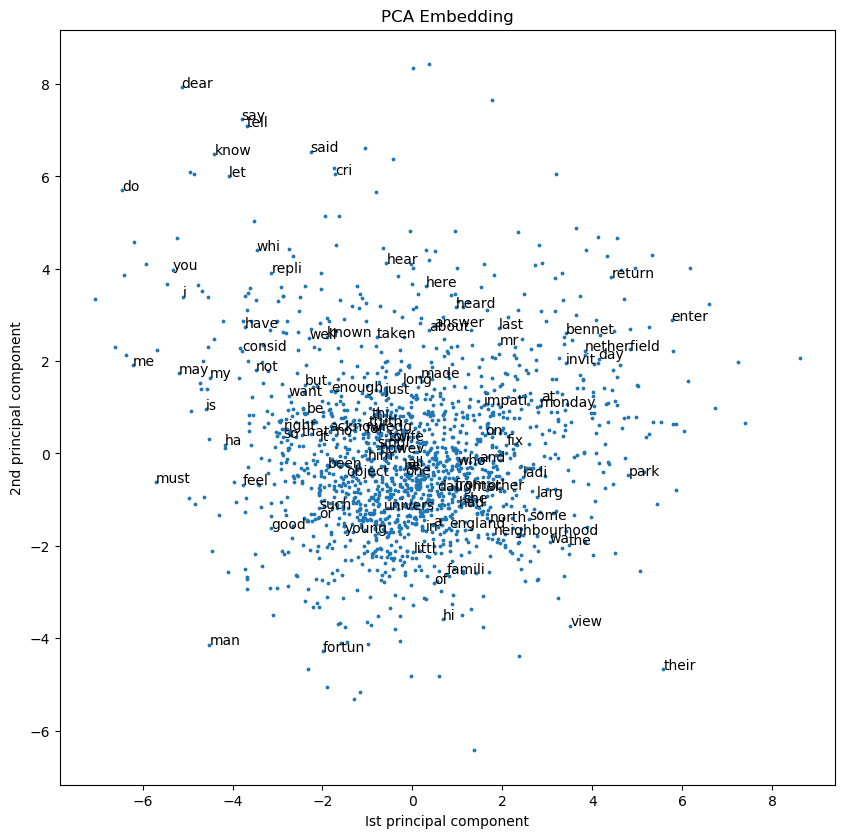

In [41]:
import matplotlib.pyplot as plt
from sklearn import decomposition
# get two principle components of the feature space
pca= decomposition.PCA(n_components=2).fit_transform(X)
# set figure settings
plt.figure(figsize=(10,10),dpi=100)
# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab_tmp)],axis=1)
df.columns = ['x', 'y', 'word']
plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')
plt.scatter(x=pca[:, 0], y=pca[:, 1],s=3)
for i, word in enumerate(df['word'][0:100]):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
plt.title("PCA Embedding")
plt.show()

In [42]:
vocab_tmp

['it',
 'is',
 'a',
 'truth',
 'univers',
 'acknowledg',
 'that',
 'singl',
 'man',
 'in',
 'good',
 'fortun',
 'must',
 'be',
 'want',
 'of',
 'wife',
 'howev',
 'littl',
 'known',
 'the',
 'feel',
 'or',
 'view',
 'such',
 'may',
 'on',
 'enter',
 'neighbourhood',
 'thi',
 'so',
 'well',
 'fix',
 'famili',
 'he',
 'consid',
 'right',
 'some',
 'one',
 'other',
 'their',
 'daughter',
 'my',
 'dear',
 'mr',
 'bennet',
 'said',
 'hi',
 'ladi',
 'to',
 'him',
 'day',
 'have',
 'you',
 'heard',
 'park',
 'let',
 'at',
 'last',
 'repli',
 'had',
 'not',
 'but',
 'return',
 'she',
 'for',
 'long',
 'ha',
 'just',
 'been',
 'here',
 'and',
 'me',
 'all',
 'about',
 'made',
 'no',
 'answer',
 'do',
 'know',
 'who',
 'taken',
 'cri',
 'impati',
 'tell',
 'i',
 'object',
 'hear',
 'wa',
 'invit',
 'enough',
 'whi',
 'say',
 'netherfield',
 'young',
 'larg',
 'from',
 'north',
 'england',
 'monday',
 'chais',
 'four',
 'see',
 'place',
 'with',
 'agre',
 'immedi',
 'take',
 'possess',
 'befor',


In [43]:
model.wv.doesnt_match("boy girl man woman happy".split())

'boy'

In [44]:
model.wv.doesnt_match("father daughter son king".split())

'king'

In [45]:
model.wv.similarity("husband", "wife")

0.079380775744901461

In [46]:
model.wv.similarity("king", "man")

0.14506687631119231

In [47]:
model.wv.most_similar("man")

[('woman', 0.7183698415756226),
 ('men', 0.4774115979671478),
 ('person', 0.4739135205745697),
 ('peopl', 0.4162597358226776),
 ('stranger', 0.3826929032802582),
 ('betray', 0.3643927276134491),
 ('comprehend', 0.36330658197402954),
 ('fellow', 0.35924232006073),
 ('pretens', 0.34801051020622253),
 ('girl', 0.34247535467147827)]

In [48]:
model.wv.most_similar("wife")

[('recept', 0.3845600485801697),
 ('friend', 0.359714150428772),
 ('endeavour', 0.3407028913497925),
 ('assist', 0.3381280303001404),
 ('style', 0.3250546455383301),
 ('motif', 0.32216572761535645),
 ('behaviour', 0.3212105631828308),
 ('contempt', 0.3081461489200592),
 ('judgement', 0.3046177327632904),
 ('notic', 0.3006322383880615)]

In [49]:
model.wv.most_similar("pleasure")

KeyError: "word 'pleasure' not in vocabulary"

# Part 3

1. Simple SELECTS (on the parents table)

In [ ]:
import sqlite3
connection = sqlite3.connect('Dogs.db')
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS parents;")
sql_command = "CREATE TABLE parents (parent VARCHAR(20),child VARCHAR(20));"
cursor.execute(sql_command)
sql_command = '''
INSERT INTO parents (parent, child)
 VALUES ("abraham", "barack") UNION
 VALUES ("abraham", "clinton") UNION
 VALUES ("delano", "herbert") UNION
 VALUES ("fillmore", "abraham") UNION
 VALUES ("fillmore", "delano") UNION
 VALUES ("fillmore", "grover") UNION
 VALUES ("eisenhower", "fillmore");
'''
cursor.execute(sql_command)

In [ ]:
import pandas as pd
import datetime as dt 
pd.read_sql_query('SELECT * FROM parents',con = connection)

In [ ]:
df = pd.read_sql_query('SELECT child, parent '
                       'FROM parents '
                       'WHERE parent = "abraham" ', connection)
df

In [ ]:
df = pd.read_sql_query('SELECT child '
                       'FROM parents '
                       'WHERE child LIKE "%e%" ', connection)
df

In [ ]:
df = pd.read_sql_query('SELECT DISTINCT parent '
                       'FROM parents '
                        'ORDER BY parent DESC;', connection)
df


In [ ]:
l = df.parent[:]
l

In [ ]:
for i in range(0,len(l)):
    e = pd.read_sql_query('SELECT child AS siblings FROM parents WHERE parent = "'+str(df.parent[i])+'" ', connection)
    print(e, '\n')
    

2.JOINS

In [ ]:
cursor.execute("DROP TABLE IF EXISTS dogs;")
sql_command = """
CREATE TABLE dogs AS
 SELECT "abraham" AS name, "long" AS fur UNION
 SELECT "barack", "short" UNION
 SELECT "clinton", "long" UNION
 SELECT "delano", "long" UNION
 SELECT "eisenhower", "short" UNION
 SELECT "fillmore", "curly" UNION
 SELECT "grover", "short" UNION
 SELECT "herbert", "curly";

"""
cursor.execute(sql_command)
sql_command = '''
SELECT *
FROM dogs
;'''

pd.read_sql_query(sql_command,connection)

In [ ]:
sql_command = '''
SELECT fur, Count(fur) AS count
FROM dogs
WHERE fur = 'short';'''

pd.read_sql_query(sql_command,connection)

In [ ]:
sql_command = '''
SELECT parent,child,fur
FROM [dogs] JOIN parents
ON [dogs].name = parents.child
WHERE fur = 'curly';'''

pd.read_sql_query(sql_command,connection)

In [ ]:
p=pd.read_sql_query('SELECT parent, child, fur FROM parents JOIN dogs WHERE parents.parent=dogs.name', connection)
c=pd.read_sql_query('SELECT child,fur FROM parents JOIN dogs WHERE parents.child=dogs.name',connection)
for i in range(0,len(p)):
    if(p.child[i]==c.child[i]):
        if(p.fur[i]==c.fur[i]):
            print("Child-Parent\n",c.child[i],"-", p.parent[i])

3 Aggregate functions, numerical logic and grouping

In [ ]:
cursor.execute("DROP TABLE IF EXISTS animals;")
sql_command = """
create table animals as
 select "dog" as kind, 4 as legs, 20 as weight union
 select "cat" , 4 , 10 union
 select "ferret" , 4 , 10 union
 select "parrot" , 2 , 6 union
 select "penguin" , 2 , 10 union
select "t-rex" , 2 , 12000;

"""
cursor.execute(sql_command)

sql_command = '''
SELECT *
FROM animals;'''

pd.read_sql_query(sql_command,connection)


In [ ]:
sql_command = '''
SELECT kind, MIN(weight)
FROM animals
;'''

pd.read_sql_query(sql_command,connection)

In [ ]:
sql_command = '''
SELECT AVG(legs) AS AVG_LEGS, AVG(weight) AS AVG_WEIGHT
FROM animals
;'''

pd.read_sql_query(sql_command,connection)

In [ ]:
sql_command = '''
SELECT kind, legs, weight
FROM animals
WHERE legs>2 AND weight<20;'''

pd.read_sql_query(sql_command,connection)

In [ ]:
sql_command = '''
SELECT AVG(weight) , legs
FROM animals
GROUP BY legs
;'''

pd.read_sql_query(sql_command,connection)